In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data =pd.read_csv("/content/drive/MyDrive/drive/Mediclaim_insuarance.csv")
data.head()

,Age,Smoke,BMI,ACC-H,Income,Med_H,Class
0,6,vhigh,2,2,low,low,bad
1,6,vhigh,2,2,low,med,bad
2,6,vhigh,2,2,low,high,bad
3,6,vhigh,2,2,avg,low,bad
4,6,vhigh,2,2,avg,med,bad


In [ ]:
#EDA
!pip install scikit-plot


In [ ]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [ ]:
data.shape

(1728, 7)

In [ ]:
target = 'Class'
labels = ['bad','ok', 'good', 'vgood']
features = [i for i in data.columns.values if i not in [target]]

original_data = data.copy(deep=True)
display(data.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(data.shape[1], data.shape[0]))

,Age,Smoke,BMI,ACC-H,Income,Med_H,Class
0,6,vhigh,2,2,low,low,bad
1,6,vhigh,2,2,low,med,bad
2,6,vhigh,2,2,low,high,bad
3,6,vhigh,2,2,avg,low,bad
4,6,vhigh,2,2,avg,med,bad



Inference: The Datset consists of 7 features & 1728 samples.


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     1728 non-null   int64 
 1   Smoke   1728 non-null   object
 2   BMI     1728 non-null   object
 3   ACC-H   1728 non-null   object
 4   Income  1728 non-null   object
 5   Med_H   1728 non-null   object
 6   Class   1728 non-null   object
dtypes: int64(1), object(6)
memory usage: 94.6+ KB


In [ ]:
data.nunique().sort_values()


ACC-H     3
Income    3
Med_H     3
Smoke     4
BMI       4
Class     4
Age       6
dtype: int64

In [ ]:
data.describe()

,Age
count,1728.000000
mean,3.485532
std,1.670209
min,1.000000
25%,2.000000
50%,3.500000
75%,4.250000
max,6.000000


In [ ]:
corr = data.corr()
corr

,Age
Age,1.0


In [ ]:
data.isnull().sum()

Age       0
Smoke     0
BMI       0
ACC-H     0
Income    0
Med_H     0
Class     0
dtype: int64

<Axes: >

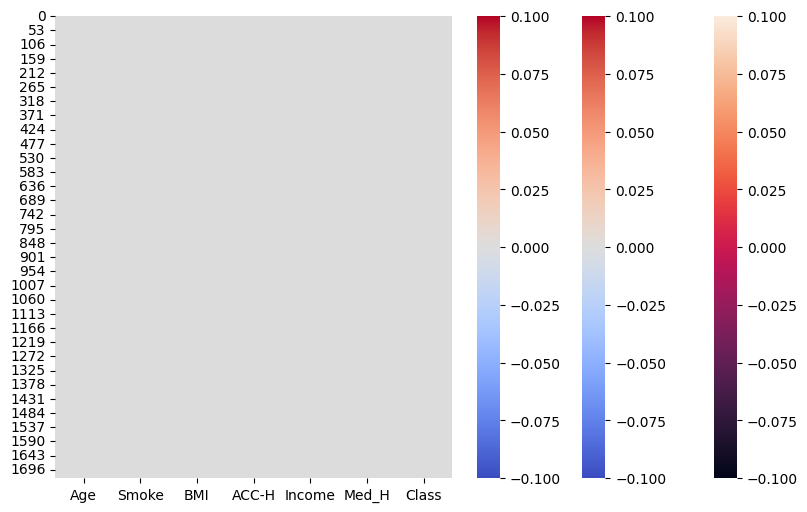

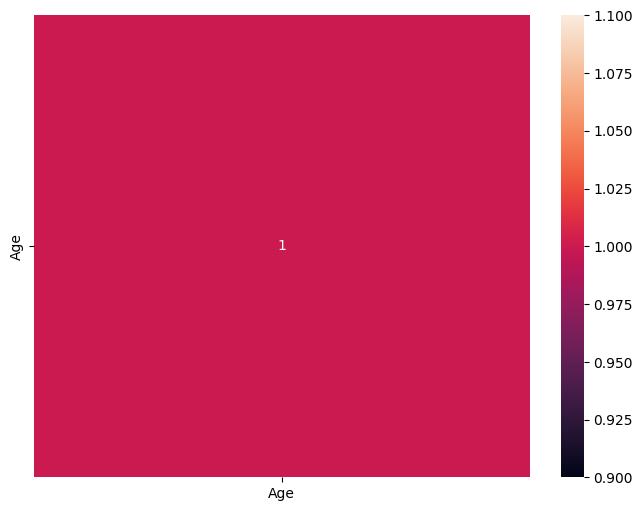

In [ ]:
import seaborn as sns
sns.heatmap(data.isna())
sns.heatmap(data.isna(), cmap='coolwarm')
sns.heatmap(data.isna(), cmap='coolwarm')
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True)


In [ ]:
#Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))




Inference: The Datset has 0 numerical & 6 categorical features.


In [ ]:
display(data.describe())


,Age
count,1728.000000
mean,3.485532
std,1.670209
min,1.000000
25%,2.000000
50%,3.500000
75%,4.250000
max,6.000000


In [ ]:
#2. Exploratory Data Analysis (EDA)



            Target Variable Distribution           


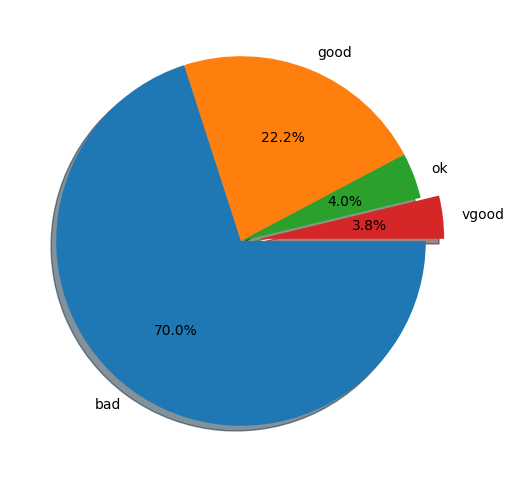

In [ ]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(sorted(data[target].unique())):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = data.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True,
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

In [ ]:
for e, i in enumerate(sorted(data[target].unique())):
  MAP[i]=labels[e]
MAP
df1 = data.copy()
df1[target]=df1[target].map(MAP)

In [ ]:
df1[target]
data[target]
explode=np.zeros(len(labels))
explode


array([0., 0., 0., 0.])

In [ ]:
explode[-1]=0.1
explode

array([0. , 0. , 0. , 0.1])

In [ ]:
print('\033[1mTarget Variable Distribution'.center(55))


            Target Variable Distribution           


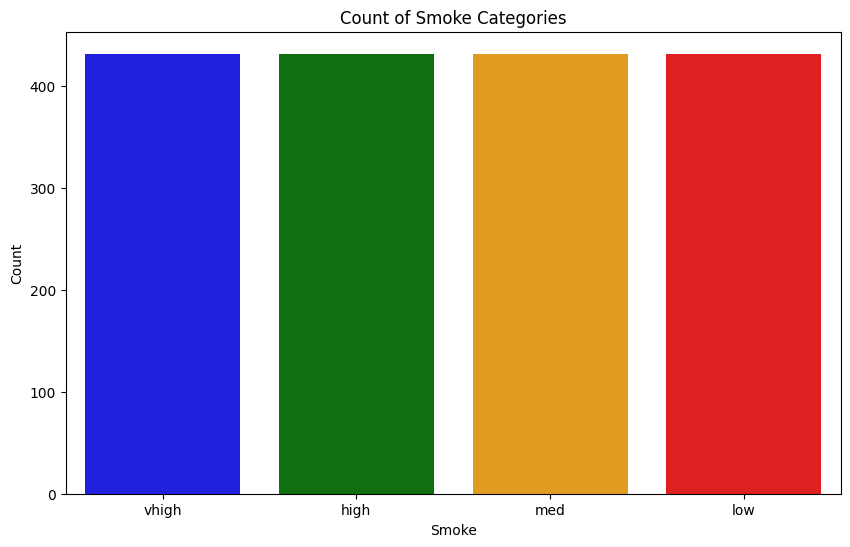

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the counts of each category of 'Smoke'
smoke_counts = data['Smoke'].value_counts()

# Define custom colors
custom_colors = ['blue', 'green', 'orange', 'red']

# Plot the bar graph with custom colors
sns.barplot(x=smoke_counts.index, y=smoke_counts.values, palette=custom_colors)

# Set labels and title
plt.xlabel('Smoke')
plt.ylabel('Count')
plt.title('Count of Smoke Categories')

# Display the plot
plt.show()

In [ ]:
#Age	Smoke	BMI	ACC-H	Income	Med_H	Class
# BMI       4
# Class     4
# Age       6

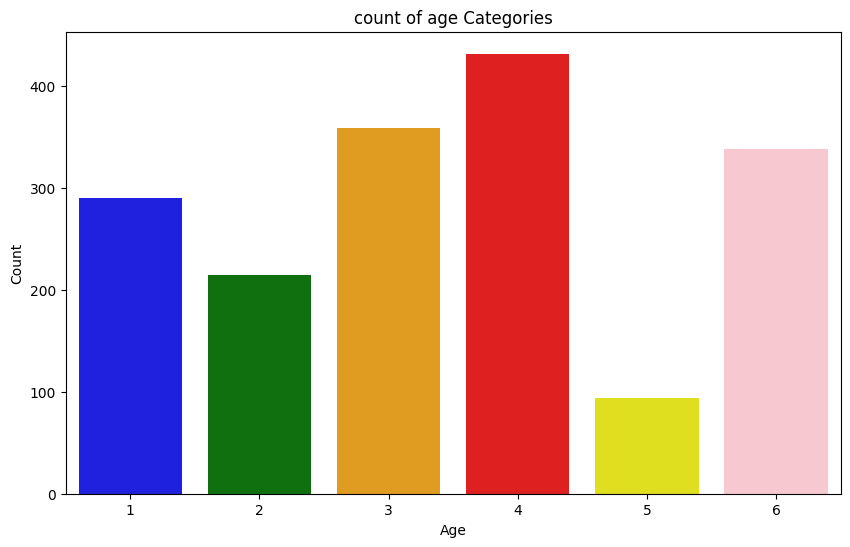

In [ ]:
age_counts = data['Age'].value_counts()

# Define custom colors
custom_colors = ['blue', 'green', 'orange', 'red','yellow','pink']

# Plot the bar graph with custom colors
sns.barplot(x=age_counts.index, y=age_counts.values, palette=custom_colors)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('count of age Categories')

# Display the plot
plt.show()

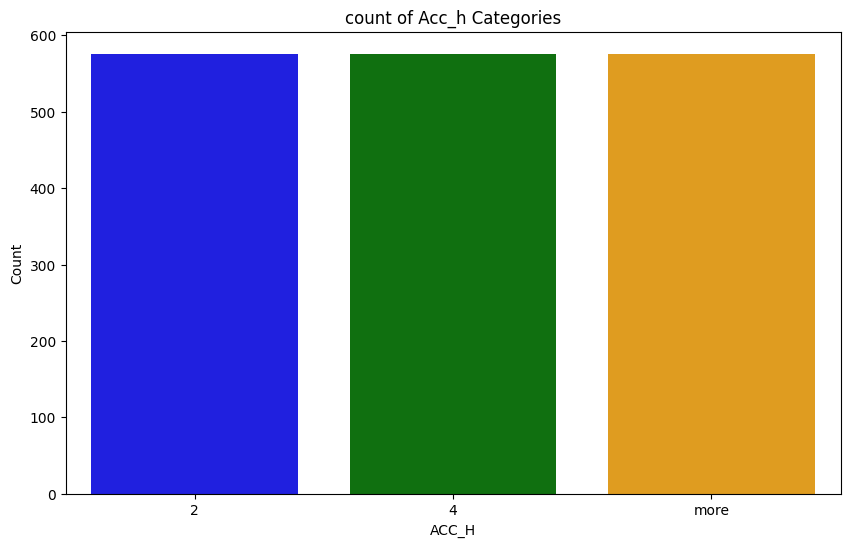

In [ ]:
acc_h_counts = data['ACC-H'].value_counts()

# Define custom colors
custom_colors = ['blue', 'green', 'orange']

# Plot the bar graph with custom colors
sns.barplot(x=acc_h_counts.index, y=acc_h_counts.values, palette=custom_colors)

# Set labels and title
plt.xlabel('ACC_H')
plt.ylabel('Count')
plt.title('count of Acc_h Categories')

# Display the plot
plt.show()

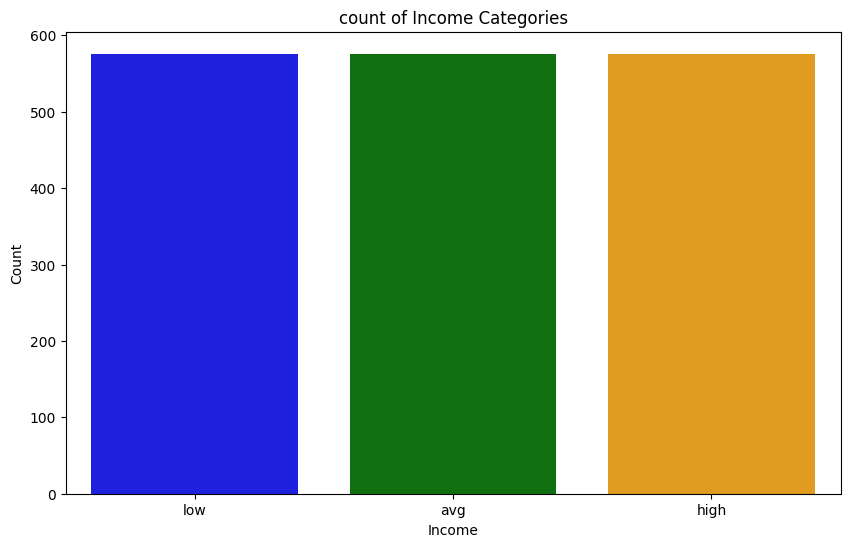

In [ ]:
income_counts = data['Income'].value_counts()

# Define custom colors
custom_colors = ['blue', 'green', 'orange']

# Plot the bar graph with custom colors
sns.barplot(x=income_counts.index, y=income_counts.values, palette=custom_colors)

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('count of Income Categories')

# Display the plot
plt.show()

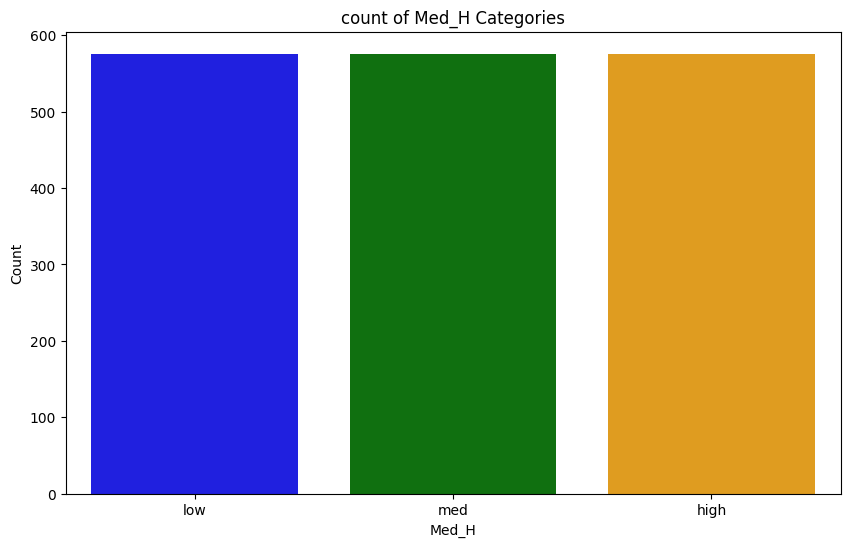

In [ ]:
med_H_counts = data['Med_H'].value_counts()

# Define custom colors
custom_colors = ['blue', 'green', 'orange']

# Plot the bar graph with custom colors
sns.barplot(x=med_H_counts.index, y=med_H_counts.values, palette=custom_colors)

# Set labels and title
plt.xlabel('Med_H')
plt.ylabel('Count')
plt.title('count of Med_H Categories')

# Display the plot
plt.show()

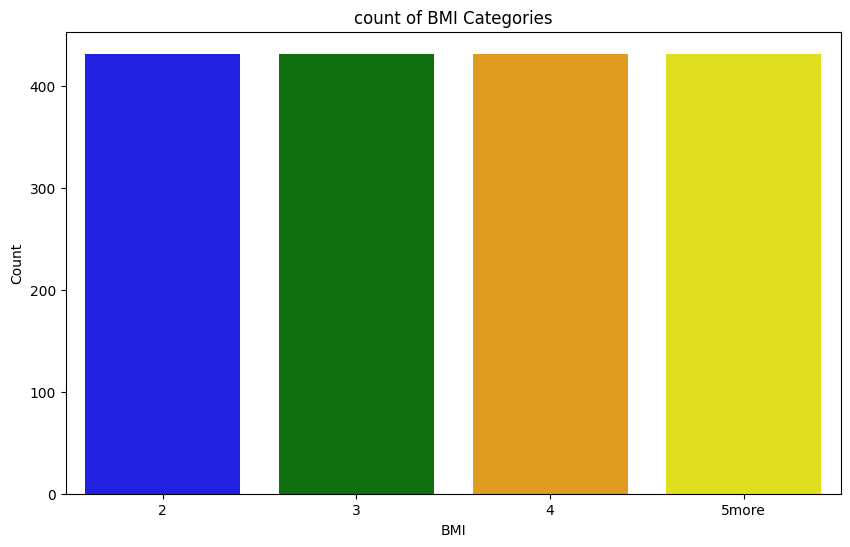

In [ ]:
bmi_counts = data['BMI'].value_counts()

# Define custom colors
custom_colors = ['blue', 'green', 'orange', 'yellow']

# Plot the bar graph with custom colors
sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette=custom_colors)

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('count of BMI Categories')

# Display the plot
plt.show()

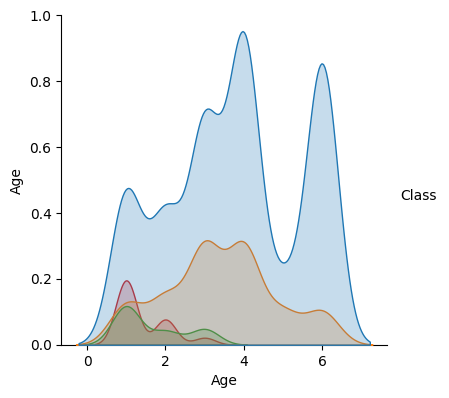

In [ ]:
#Understanding the relationship between all the features

g=sns.pairplot(df1, hue=target, size=4)
g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

In [ ]:
#Removal of any Duplicate rows (if any)

counter = 0
original_df = df1.copy()
rows, columns = original_df.shape
df2 = original_df.copy()
df2.drop_duplicates(inplace=True)
df2.reset_index(drop=True,inplace=True)

if df2.shape==(rows,columns):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df2.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [ ]:
#Check for empty elements

nvc = pd.DataFrame(df2.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df2.shape[0],3)*100
print(nvc)

        Total Null Values  Percentage
Age                     0         0.0
Smoke                   0         0.0
BMI                     0         0.0
ACC-H                   0         0.0
Income                  0         0.0
Med_H                   0         0.0
Class                   0         0.0


In [ ]:
#Converting categorical Columns to Numeric

#df1 = df.copy()
ecc = nvc[nvc['Percentage']!=0].index.values
dcc = [i for i in data.columns if i not in ecc]

df3 = df2[dcc]
fcc = [i for i in cf if i not in ecc]

#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1m\nOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)

df3.shape


Dummy Encoding on features:
ACC-H
Income
Med_H
Smoke
BMI
Age


(1728, 18)

In [ ]:
df3

,Class,ACC-H_4,ACC-H_more,Income_high,Income_low,Med_H_low,Med_H_med,Smoke_low,Smoke_med,Smoke_vhigh,BMI_3,BMI_4,BMI_5more,Age_2,Age_3,Age_4,Age_5,Age_6
0,bad,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
1,bad,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
2,bad,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,bad,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,bad,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,ok,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
1724,vgood,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1725,bad,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
1726,ok,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
df4 = df3.copy()

for i in [i for i in df4.columns]:
    if df4[i].nunique()>=12:
        Q1 = df4[i].quantile(0.25)
        Q3 = df4[i].quantile(0.75)
        IQR = Q3 - Q1
        df4 = df4[df4[i] <= (Q3+(1.5*IQR))]
        df4 = df4[df4[i] >= (Q1-(1.5*IQR))]
df4 = df4.reset_index(drop=True)
display(df4.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df4.shape[0]))


,Class,ACC-H_4,ACC-H_more,Income_high,Income_low,Med_H_low,Med_H_med,Smoke_low,Smoke_med,Smoke_vhigh,BMI_3,BMI_4,BMI_5more,Age_2,Age_3,Age_4,Age_5,Age_6
0,bad,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
1,bad,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
2,bad,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,bad,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,bad,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1



Inference: Before removal of outliers, The dataset had 1728 samples.
Inference: After removal of outliers, The dataset now has 1728 samples.


In [ ]:
#Fixing the imbalance using SMOTE Technique

df5 = df4.copy()

print('Original class distribution:')
print(df5[target].value_counts())

xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
bad      1210
good      384
ok         69
vgood      65
Name: Class, dtype: int64

Class distribution after applying SMOTE Technique:
bad      1210
good     1210
vgood    1210
ok       1210
Name: Class, dtype: int64


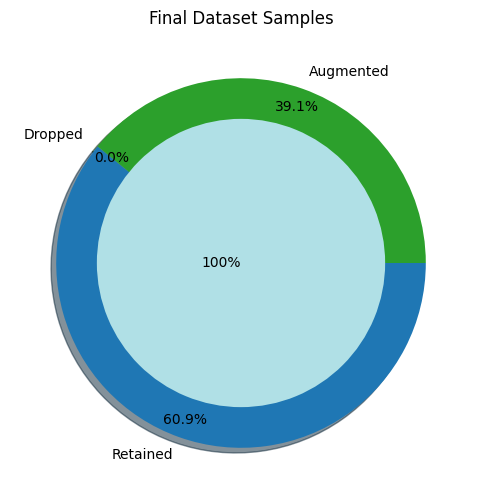


Inference:The final dataset after cleanup has 4840 samples & 18 columns.


In [ ]:
#Final Dataset size after performing Preprocessing

df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))


In [ ]:
#Splitting the data intro training & testing sets
from sklearn.preprocessing import LabelEncoder


df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

y = ['bad', 'good', 'ok', 'vgood']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform target variable
y_encoded = label_encoder.fit_transform(y)



label_encoder = LabelEncoder()
Test_Y = label_encoder.fit_transform(Test_Y)
Train_Y = label_encoder.fit_transform(Train_Y)

Original set  --->  (4840, 17) (4840,) 
Training set  --->  (3872, 17) (3872,) 
Testing set   --->  (968, 17)  (968,)


In [ ]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,ACC-H_4,ACC-H_more,Income_high,Income_low,Med_H_low,Med_H_med,Smoke_low,Smoke_med,Smoke_vhigh,BMI_3,BMI_4,BMI_5more,Age_2,Age_3,Age_4,Age_5,Age_6
count,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3872.000000,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3872.000000,3872.000000,3.872000e+03
mean,-1.284556e-17,1.651571e-17,2.798496e-17,-3.119635e-17,-1.835079e-17,-3.303143e-17,-2.844373e-17,0.000000,-1.651571e-17,2.936127e-17,-1.651571e-17,9.175397e-19,5.505238e-18,2.936127e-17,0.000000,0.000000,-3.670159e-18
std,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129,1.000129,1.000129e+00
min,-1.531757e-01,-1.476590e-01,-2.163097e-01,-1.797831e-01,-3.667230e-01,-1.621092e-01,-1.591371e-01,-0.166312,-7.860886e-02,-2.257444e-01,-2.062716e-01,-2.169461e-01,-1.958390e-01,-1.751910e-01,-0.070917,-0.049341,-4.725005e-02
25%,-1.531757e-01,-1.476590e-01,-2.163097e-01,-1.797831e-01,-3.667230e-01,-1.621092e-01,-1.591371e-01,-0.166312,-7.860886e-02,-2.257444e-01,-2.062716e-01,-2.169461e-01,-1.958390e-01,-1.751910e-01,-0.070917,-0.049341,-4.725005e-02
50%,-1.531757e-01,-1.476590e-01,-2.163097e-01,-1.797831e-01,-3.667230e-01,-1.621092e-01,-1.591371e-01,-0.166312,-7.860886e-02,-2.257444e-01,-2.062716e-01,-2.169461e-01,-1.958390e-01,-1.751910e-01,-0.070917,-0.049341,-4.725005e-02
75%,-1.087157e-01,-1.030688e-01,-1.857299e-01,-1.450863e-01,-3.667230e-01,-1.218858e-01,-1.154427e-01,-0.125332,-7.860886e-02,-1.983024e-01,-1.764221e-01,-1.882326e-01,-1.958390e-01,-1.751910e-01,-0.070917,-0.049341,-4.725005e-02
max,1.100628e+01,1.104449e+01,7.550969e+00,8.667877e+00,2.726853e+00,1.009487e+01,1.098294e+01,10.201630,1.855950e+01,6.744522e+00,7.405355e+00,7.105014e+00,8.029250e+00,8.804034e+00,26.726403,30.040636,3.779951e+01



                                Standardardization on Testing set                                


,ACC-H_4,ACC-H_more,Income_high,Income_low,Med_H_low,Med_H_med,Smoke_low,Smoke_med,Smoke_vhigh,BMI_3,BMI_4,BMI_5more,Age_2,Age_3,Age_4,Age_5,Age_6
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,-0.049926,0.013658,0.032657,-0.023791,0.007191,-0.004914,0.109078,0.019664,-0.025622,-0.007031,-0.024831,0.046519,0.001524,-0.005105,-0.006728,-0.025164,-0.026647
std,0.768812,1.037225,1.067813,0.893845,1.008945,0.986212,1.405386,1.051234,0.725221,1.017361,0.943861,1.102684,1.041027,0.943350,1.086533,0.497729,0.225978
min,-0.153176,-0.147659,-0.216310,-0.179783,-0.366723,-0.162109,-0.159137,-0.166312,-0.078609,-0.225744,-0.206272,-0.216946,-0.195839,-0.175191,-0.070917,-0.049341,-0.047250
25%,-0.153176,-0.147659,-0.216310,-0.179783,-0.366723,-0.162109,-0.159137,-0.166312,-0.078609,-0.225744,-0.206272,-0.216946,-0.195839,-0.175191,-0.070917,-0.049341,-0.047250
50%,-0.153176,-0.147659,-0.216310,-0.179783,-0.366723,-0.162109,-0.159137,-0.166312,-0.078609,-0.225744,-0.206272,-0.216946,-0.195839,-0.175191,-0.070917,-0.049341,-0.047250
75%,-0.108716,-0.103069,-0.185730,-0.179783,-0.366723,-0.121886,-0.115443,-0.125332,-0.078609,-0.198302,-0.198809,-0.188233,-0.195839,-0.175191,-0.070917,-0.049341,-0.047250
max,10.650599,10.687764,7.489810,8.216819,2.726853,10.094870,10.939246,9.545950,15.184093,6.744522,7.315807,7.076300,7.867974,8.839525,24.164109,13.801601,6.862532


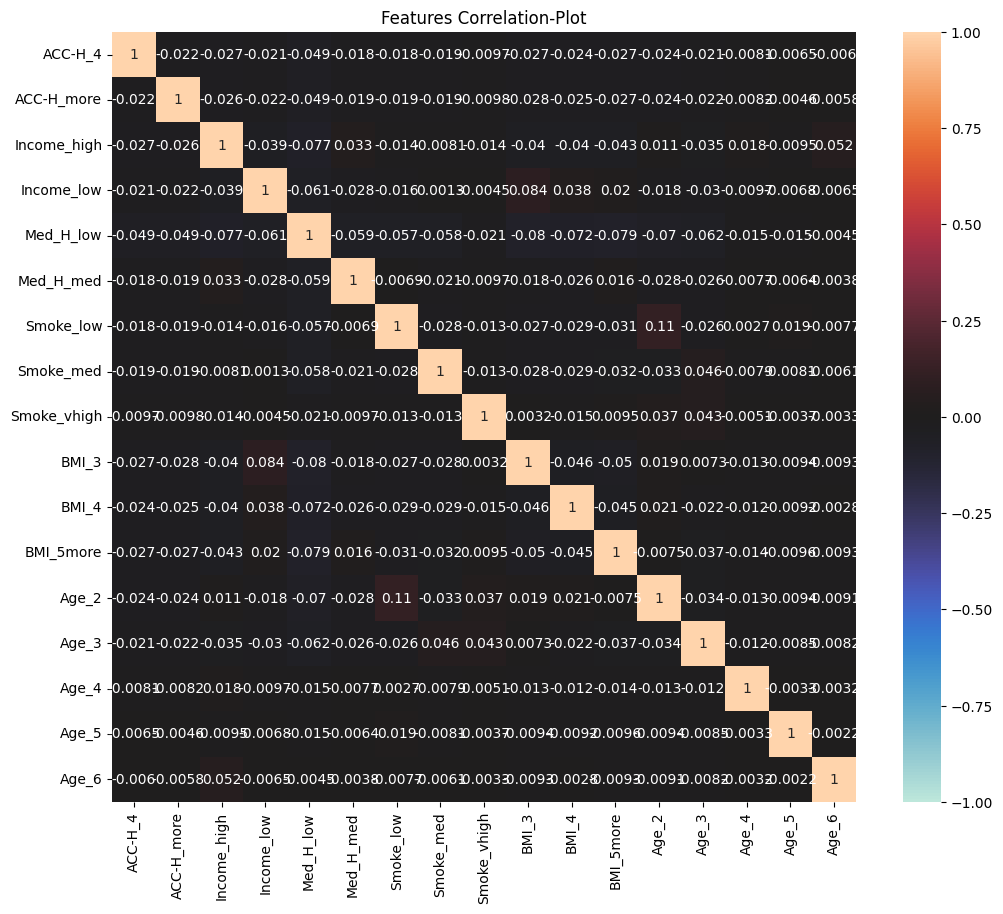

In [ ]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #,
plt.show()

In [ ]:
# Calculate the VIFs to remove multicollinearity

from sklearn.metrics import f1_score

from sklearn.preprocessing import LabelEncoder


DROP=[]; scores1=[]; scores2=[]; scores3=[]
# scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))
scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y, eval_metric='logloss').predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)

print(scores1)
print(scores2)
print(scores3)



for i in tqdm(range(len(X.columns.values)-1)):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    #print(DROP)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>1:
        scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y, eval_metric='logloss').predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        print(scores1)
        print(scores2)
        print(scores3)

    #print(scores)

# plt.plot(scores1, label='LR')
# plt.plot(scores2, label='RF')
# plt.plot(scores3, label='XG')
# #plt.ylim([0.7,0.85])
# plt.legend()
# plt.grid()
# plt.show()

[68.46984527756679]
[99.0695478900859]
[100.0]


100%|██████████| 16/16 [00:01<00:00, 15.52it/s]


100%|██████████| 17/17 [01:09<00:00,  4.06s/it]


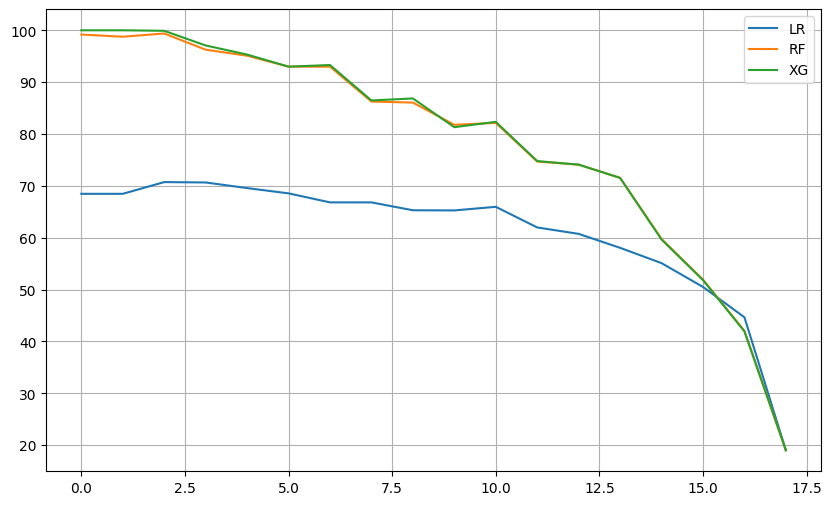

In [ ]:
# Applying Recurrsive Feature Elimination

# Running RFE with the output number of the variable equal to 10
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores1=[]; scores2=[]; scores3=[]
scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std, Train_Y, eval_metric='logloss').predict(Test_X_std),average='weighted')*100)

for i in tqdm(range(len(X.columns.values))):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)

plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
#plt.ylim([0.80,0.84])
plt.legend()
plt.grid()
plt.show()

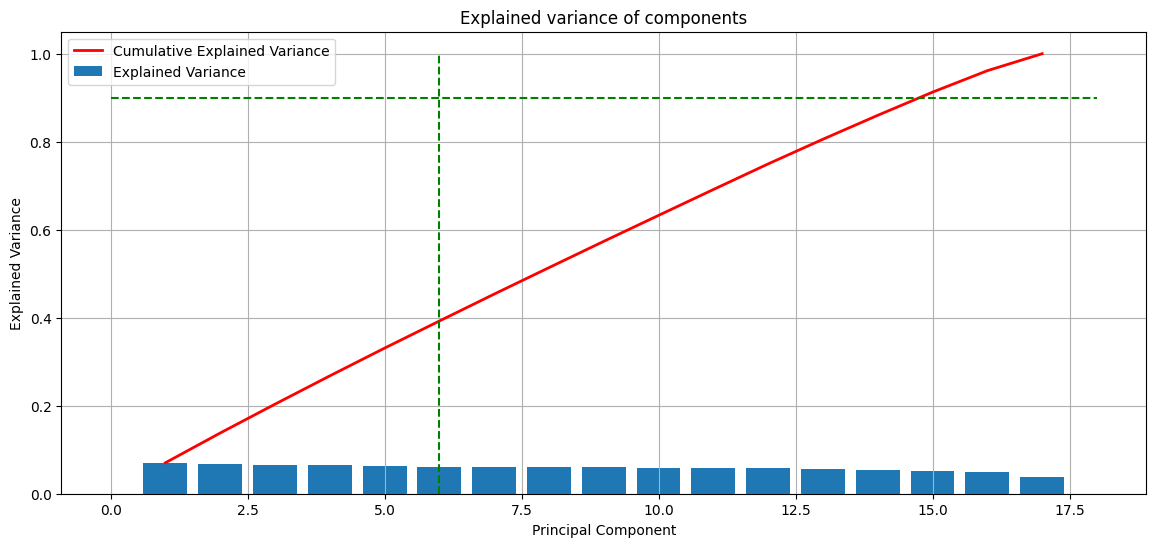

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([6,6],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()

100%|██████████| 17/17 [01:05<00:00,  3.88s/it]


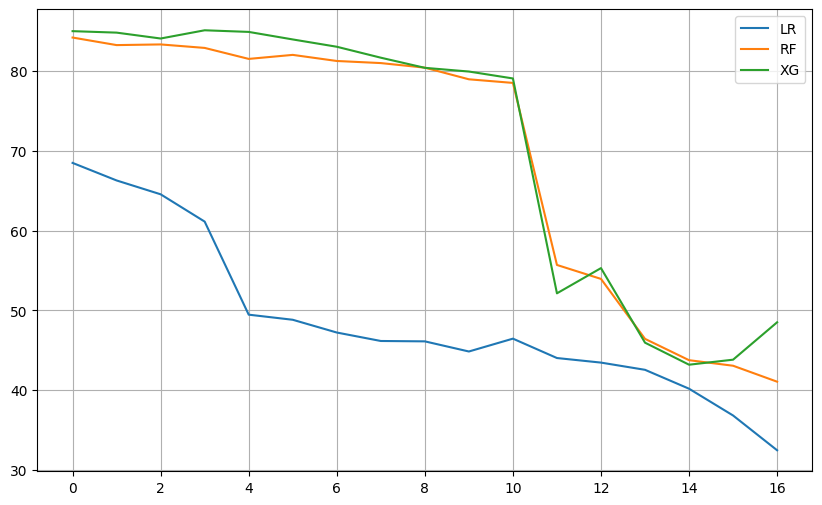

In [ ]:
#Applying PCA Transformations

# scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
# scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
# scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std, Train_Y, eval_metric='logloss').predict(Test_X_std),average='weighted')*100)

scores1=[]; scores2=[]; scores3=[]
for i in tqdm(range(len(X.columns.values))):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    #print('The shape of final transformed training feature set:')
    #print(Train_X_std_pca.shape)
    Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

    Test_X_std_pca = pca.transform(Test_X_std)
    #print('\nThe shape of final transformed testing feature set:')
    #print(Test_X_std_pca.shape)
    Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std_pca, Train_Y, eval_metric='logloss').predict(Test_X_std_pca),average='weighted')*100)


plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
#plt.ylim([0.80,0.84])
plt.legend()
plt.grid()
plt.show()

In [ ]:
#### Finalising the shortlisted features

rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns))
rfe = rfe.fit(Train_X_std, Train_Y)

print(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
print(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
print(f1_score(Test_Y,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)

# Train_X_std = Train_X_std[Train_X_std.columns[rfe.support_]]
# Test_X_std = Test_X_std[Test_X_std.columns[rfe.support_]]

print(Train_X_std.shape)
print(Test_X_std.shape)

68.46984527756679
99.07043853768997
100.0
(3872, 17)
(968, 17)


In [ ]:
#Let us create first create a table to store the results of various models

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [ ]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
  print(Evaluation_Results)
  auc_roc(Test_Y, pred_prob, curves=['each_class'])
  plt.show()
  Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100
  Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
  Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
  Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
  Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob, multi_class='ovr'),3)*100 #[:, 1]


  print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
  print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
  print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
  print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
  print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))


#Visualising Function
def AUC_ROC_plot(Test_Y, pred):
  ref = [0 for _ in range(len(Test_Y))]
  ref_auc = roc_auc_score(Test_Y, ref)
  lr_auc = roc_auc_score(Test_Y, pred)

  ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
  lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

  plt.plot(ns_fpr, ns_tpr, linestyle='--')
  plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2)))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             46.5       60.3    46.5      47.7   
Decision Tree Classifier (DT)         0.0        0.0     0.0       0.0   
Random Forest Classifier (RF)         0.0        0.0     0.0       0.0   
Naïve Bayes Classifier (NB)           0.0        0.0     0.0       0.0   
Support Vector Machine (SVM)          0.0        0.0     0.0       0.0   
K Nearest Neighbours (KNN)            0.0        0.0     0.0       0.0   
Gradient Boosting (GB)                0.0        0.0     0.0       0.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  81.4  
Decision Tree Classifier (DT)              0.0  
Random Forest Classifier (RF)              0.0  
Naïve Bayes Classifier (NB)                0.0  
Support Vector Machine (SVM)               0.0  
K Nearest Neighbours (KNN)             

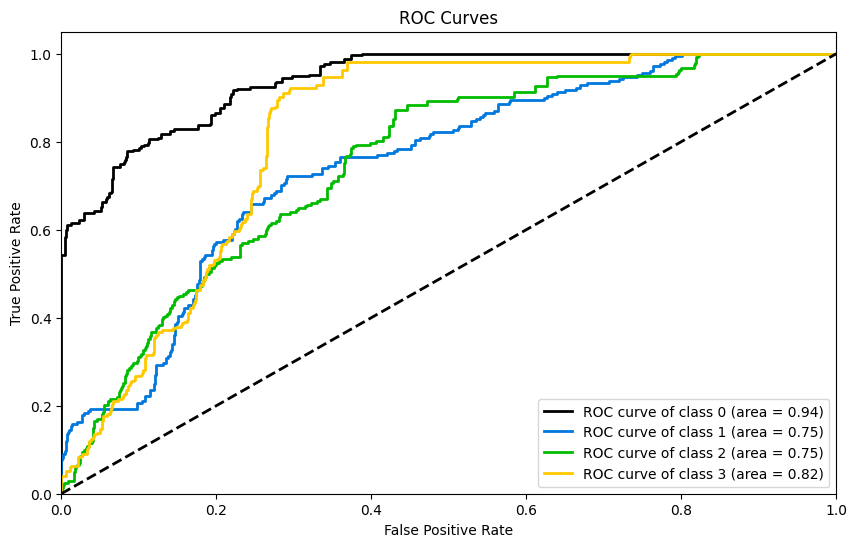

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 46.5%
F1 Score = 47.699999999999996%

 Confusiton Matrix:
 [[117 135   0   0]
 [  0 157  20  31]
 [  0 109  71  62]
 [  0 117  44 105]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.46      0.63       252
           1       0.30      0.75      0.43       208
           2       0.53      0.29      0.38       242
           3       0.53      0.39      0.45       266

    accuracy                           0.46       968
   macro avg       0.59      0.48      0.47       968
weighted avg       0.60      0.46      0.48       968


Interpreting the Output of Logistic Regression:

intercept  -0.23307065358211268
classes [0 1 2 3]


,coeff
ACC-H_4,-0.210475
ACC-H_more,-0.208157
Income_high,-0.297491
Income_low,-0.183519
Med_H_low,0.889428
Med_H_med,-0.158431
Smoke_low,-0.217161
Smoke_med,-0.229721
Smoke_vhigh,-0.007561
BMI_3,-0.304642


In [ ]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_

pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)

Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))



[1 2 3 2 2 3 1 0 2 3 1 0 1 3 2 1 0 3 0 1 1 0 3 0 2 3 3 2 2 1 2 3 2 3 1 1 0
 3 0 0 0 3 0 1 0 2 1 2 0 2 0 0 0 0 0 0 2 2 2 2 3 2 1 3 1 0 1 3 2 0 0 0 2 2
 0 1 1 2 3 0 0 1 2 1 3 3 3 0 2 3 3 1 1 0 2 1 1 1 3 3 3 3 1 0 1 0 1 2 3 2 0
 0 1 0 3 2 3 2 3 3 0 3 1 3 3 0 3 2 3 1 3 0 3 0 3 2 1 2 3 1 3 2 3 0 1 3 0 3
 1 0 1 1 2 1 0 2 3 3 2 2 3 0 3 1 1 2 3 1 1 3 3 0 2 2 0 1 1 2 3 1 1 2 0 2 3
 0 0 3 3 2 3 3 3 3 3 1 2 2 0 1 0 1 1 3 0 2 2 1 0 1 3 2 0 3 3 0 1 0 2 2 1 1
 0 3 2 1 0 3 2 2 2 1 1 1 3 0 3 0 0 3 3 3 2 3 2 3 2 2 3 0 0 0 3 3 2 0 2 0 2
 0 3 0 2 0 2 1 0 1 1 1 0 2 2 2 1 0 3 2 3 3 0 2 3 3 1 2 0 3 2 0 2 1 3 1 2 0
 2 0 3 3 0 3 2 0 0 1 1 3 0 2 3 3 2 3 1 1 0 3 3 0 0 1 3 0 1 2 2 1 1 3 0 3 0
 2 1 2 0 2 0 3 3 3 3 0 0 1 2 2 3 3 0 0 3 3 2 3 3 2 3 0 1 3 3 1 1 2 0 0 0 2
 3 2 1 2 0 1 2 2 0 1 3 2 3 0 3 2 0 1 0 0 1 3 1 1 3 1 2 2 0 1 0 2 3 3 3 0 2
 1 1 2 2 1 2 1 0 0 2 2 0 0 3 2 3 2 3 0 1 1 3 3 0 0 2 0 1 2 3 2 2 2 3 3 3 0
 3 2 1 0 1 1 2 3 2 0 3 2 1 1 3 1 2 0 0 1 1 2 1 1 2 0 3 0 0 3 1 2 2 3 1 1 1
 0 2 0 0 0 3 0 2 2 2 0 1 

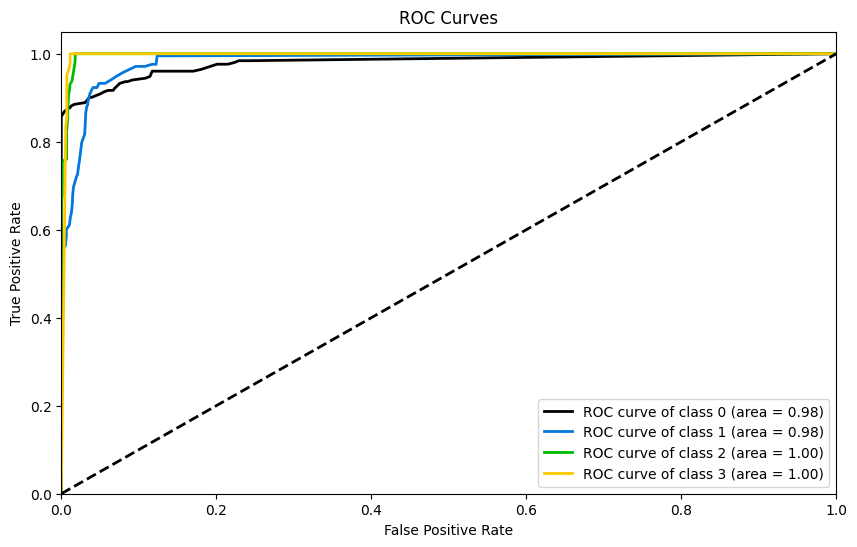

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 94.5%
F1 Score = 94.5%

 Confusiton Matrix:
 [[220  27   1   4]
 [  5 187  12   4]
 [  0   0 242   0]
 [  0   0   0 266]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       252
           1       0.87      0.90      0.89       208
           2       0.95      1.00      0.97       242
           3       0.97      1.00      0.99       266

    accuracy                           0.95       968
   macro avg       0.94      0.94      0.94       968
weighted avg       0.95      0.95      0.94       968


Interpreting the output of Decision Tree:



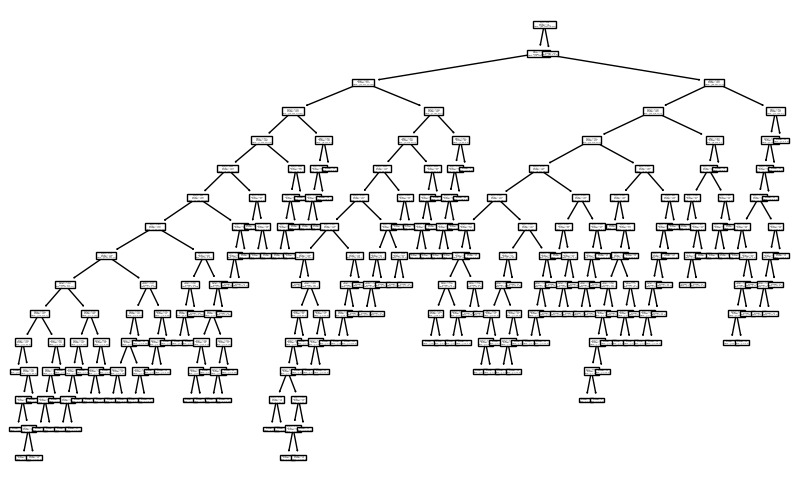

In [ ]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, len(features)-1),
              "min_samples_leaf": randint(1, len(features)-1),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)


DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)


true_labels = Test_Y

# Assuming a threshold value
threshold = 0.5

# Calling the Classification_Summary method
# Classification_Summary(pred, pred_prob, 0)


print(pred)
print(pred_prob)


# Check shapes of pred and pred_prob
print("Shape of pred:", pred.shape)
print("Shape of pred_prob:", pred_prob.shape)

Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             46.5       60.3    46.5      47.7   
Decision Tree Classifier (DT)        94.5       94.6    94.5      94.5   
Random Forest Classifier (RF)         0.0        0.0     0.0       0.0   
Naïve Bayes Classifier (NB)           0.0        0.0     0.0       0.0   
Support Vector Machine (SVM)          0.0        0.0     0.0       0.0   
K Nearest Neighbours (KNN)            0.0        0.0     0.0       0.0   
Gradient Boosting (GB)                0.0        0.0     0.0       0.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  81.4  
Decision Tree Classifier (DT)             98.9  
Random Forest Classifier (RF)              0.0  
Naïve Bayes Classifier (NB)                0.0  
Support Vector Machine (SVM)               0.0  
K Nearest Neighbours (KNN)             

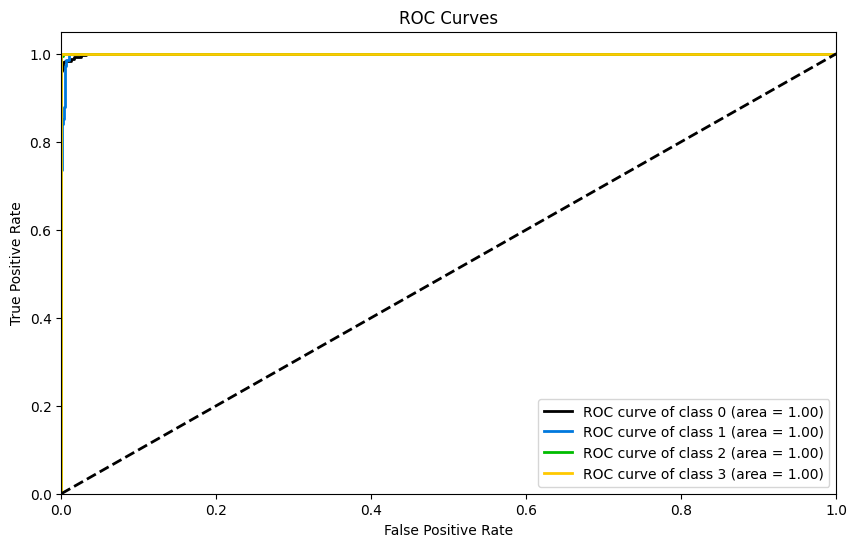

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 98.9%
F1 Score = 98.9%

 Confusiton Matrix:
 [[243   7   2   0]
 [  2 206   0   0]
 [  0   0 242   0]
 [  0   0   0 266]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       252
           1       0.97      0.99      0.98       208
           2       0.99      1.00      1.00       242
           3       1.00      1.00      1.00       266

    accuracy                           0.99       968
   macro avg       0.99      0.99      0.99       968
weighted avg       0.99      0.99      0.99       968


Interpreting the output of Random Forest:



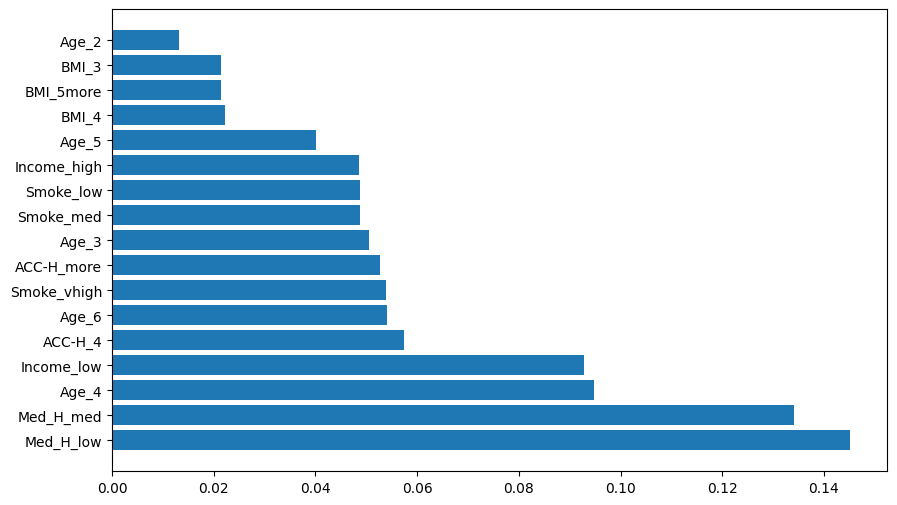

In [ ]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             46.5       60.3    46.5      47.7   
Decision Tree Classifier (DT)        94.5       94.6    94.5      94.5   
Random Forest Classifier (RF)        98.9       98.9    98.9      98.9   
Naïve Bayes Classifier (NB)           0.0        0.0     0.0       0.0   
Support Vector Machine (SVM)          0.0        0.0     0.0       0.0   
K Nearest Neighbours (KNN)            0.0        0.0     0.0       0.0   
Gradient Boosting (GB)                0.0        0.0     0.0       0.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  81.4  
Decision Tree Classifier (DT)             98.9  
Random Forest Classifier (RF)            100.0  
Naïve Bayes Classifier (NB)                0.0  
Support Vector Machine (SVM)               0.0  
K Nearest Neighbours (KNN)             

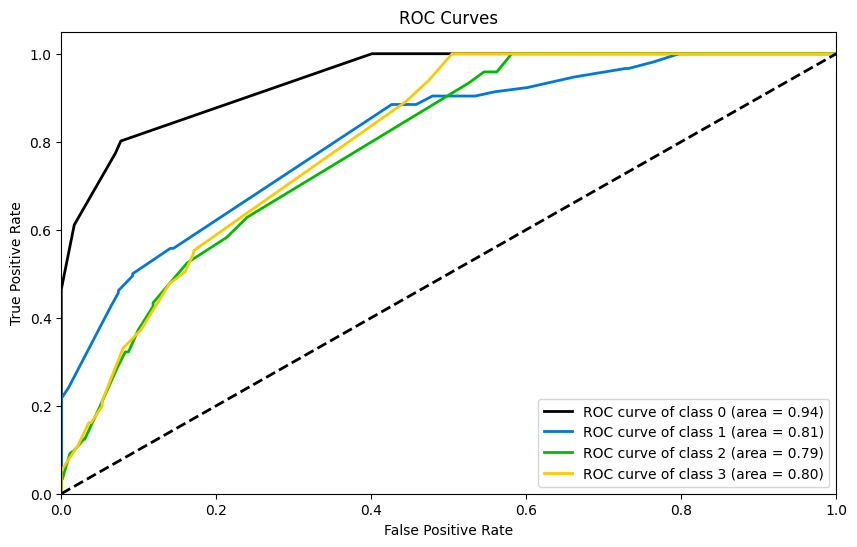

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 56.599999999999994%
F1 Score = 56.599999999999994%

 Confusiton Matrix:
 [[154  48   0  50]
 [ 12  95  13  88]
 [  0   8  82 152]
 [  0   0  49 217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.61      0.74       252
           1       0.63      0.46      0.53       208
           2       0.57      0.34      0.42       242
           3       0.43      0.82      0.56       266

    accuracy                           0.57       968
   macro avg       0.64      0.56      0.56       968
weighted avg       0.64      0.57      0.57       968



In [ ]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             46.5       60.3    46.5      47.7   
Decision Tree Classifier (DT)        94.5       94.6    94.5      94.5   
Random Forest Classifier (RF)        98.9       98.9    98.9      98.9   
Naïve Bayes Classifier (NB)          56.6       63.7    56.6      56.6   
Support Vector Machine (SVM)          0.0        0.0     0.0       0.0   
K Nearest Neighbours (KNN)            0.0        0.0     0.0       0.0   
Gradient Boosting (GB)                0.0        0.0     0.0       0.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  81.4  
Decision Tree Classifier (DT)             98.9  
Random Forest Classifier (RF)            100.0  
Naïve Bayes Classifier (NB)               83.7  
Support Vector Machine (SVM)               0.0  
K Nearest Neighbours (KNN)             

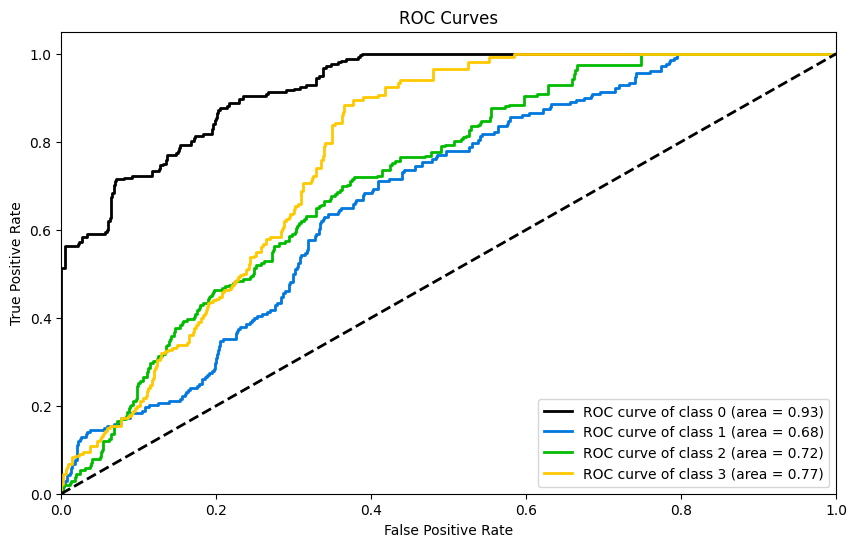

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 33.6%
F1 Score = 24.9%

 Confusiton Matrix:
 [[117 135   0   0]
 [  0 208   0   0]
 [  0 242   0   0]
 [  0 266   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.46      0.63       252
           1       0.24      1.00      0.39       208
           2       0.00      0.00      0.00       242
           3       0.00      0.00      0.00       266

    accuracy                           0.34       968
   macro avg       0.31      0.37      0.26       968
weighted avg       0.31      0.34      0.25       968



In [ ]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             46.5       60.3    46.5      47.7   
Decision Tree Classifier (DT)        94.5       94.6    94.5      94.5   
Random Forest Classifier (RF)        98.9       98.9    98.9      98.9   
Naïve Bayes Classifier (NB)          56.6       63.7    56.6      56.6   
Support Vector Machine (SVM)         33.6       31.3    33.6      24.9   
K Nearest Neighbours (KNN)            0.0        0.0     0.0       0.0   
Gradient Boosting (GB)                0.0        0.0     0.0       0.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  81.4  
Decision Tree Classifier (DT)             98.9  
Random Forest Classifier (RF)            100.0  
Naïve Bayes Classifier (NB)               83.7  
Support Vector Machine (SVM)              77.3  
K Nearest Neighbours (KNN)             

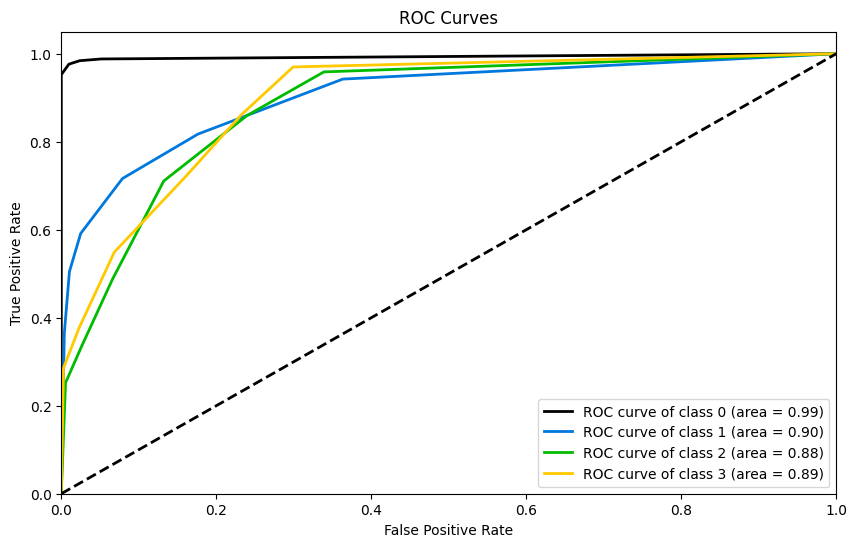

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 75.3%
F1 Score = 75.3%

 Confusiton Matrix:
 [[246   6   0   0]
 [  7 147  25  29]
 [  0  31 163  48]
 [  0  33  60 173]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       252
           1       0.68      0.71      0.69       208
           2       0.66      0.67      0.67       242
           3       0.69      0.65      0.67       266

    accuracy                           0.75       968
   macro avg       0.75      0.75      0.75       968
weighted avg       0.75      0.75      0.75       968



In [ ]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             46.5       60.3    46.5      47.7   
Decision Tree Classifier (DT)        94.5       94.6    94.5      94.5   
Random Forest Classifier (RF)        98.9       98.9    98.9      98.9   
Naïve Bayes Classifier (NB)          56.6       63.7    56.6      56.6   
Support Vector Machine (SVM)         33.6       31.3    33.6      24.9   
K Nearest Neighbours (KNN)           75.3       75.3    75.3      75.3   
Gradient Boosting (GB)               57.3       64.1    57.3      57.8   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  81.4  
Decision Tree Classifier (DT)             98.9  
Random Forest Classifier (RF)            100.0  
Naïve Bayes Classifier (NB)               83.7  
Support Vector Machine (SVM)              77.3  
K Nearest Neighbours (KNN)             

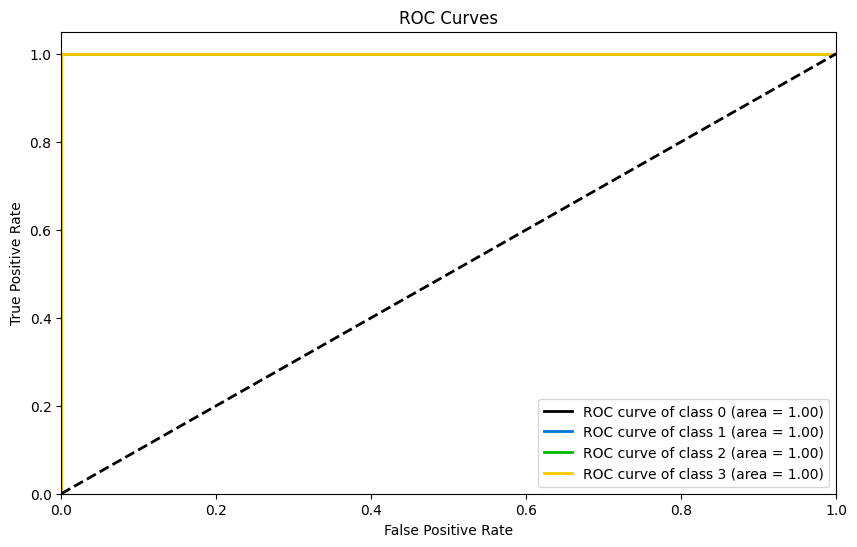

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 100.0%
F1 Score = 100.0%

 Confusiton Matrix:
 [[252   0   0   0]
 [  0 208   0   0]
 [  0   0 242   0]
 [  0   0   0 266]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       208
           2       1.00      1.00      1.00       242
           3       1.00      1.00      1.00       266

    accuracy                           1.00       968
   macro avg       1.00      1.00      1.00       968
weighted avg       1.00      1.00      1.00       968



In [ ]:
# Building Gradient Boosting Classifier

GB_model = XGBClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = GB_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

In [ ]:
print(Evaluation_Results)


                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             46.5       60.3    46.5      47.7   
Decision Tree Classifier (DT)        94.5       94.6    94.5      94.5   
Random Forest Classifier (RF)        98.9       98.9    98.9      98.9   
Naïve Bayes Classifier (NB)          56.6       63.7    56.6      56.6   
Support Vector Machine (SVM)         33.6       31.3    33.6      24.9   
K Nearest Neighbours (KNN)           75.3       75.3    75.3      75.3   
Gradient Boosting (GB)              100.0      100.0   100.0     100.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  81.4  
Decision Tree Classifier (DT)             98.9  
Random Forest Classifier (RF)            100.0  
Naïve Bayes Classifier (NB)               83.7  
Support Vector Machine (SVM)              77.3  
K Nearest Neighbours (KNN)             

In [ ]:
print(Evaluation_Results)

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             46.5       60.3    46.5      47.7   
Decision Tree Classifier (DT)        94.5       94.6    94.5      94.5   
Random Forest Classifier (RF)        98.9       98.9    98.9      98.9   
Naïve Bayes Classifier (NB)          56.6       63.7    56.6      56.6   
Support Vector Machine (SVM)         33.6       31.3    33.6      24.9   
K Nearest Neighbours (KNN)           75.3       75.3    75.3      75.3   
Gradient Boosting (GB)               97.4       97.4    97.4      97.4   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  81.4  
Decision Tree Classifier (DT)             98.9  
Random Forest Classifier (RF)            100.0  
Naïve Bayes Classifier (NB)               83.7  
Support Vector Machine (SVM)              77.3  
K Nearest Neighbours (KNN)             